In [1]:
%%writefile Gradiente_Busqueda_Lineal.ipynb

Overwriting Gradiente_Busqueda_Lineal.ipynb


In [30]:
%matplotlib inline

In [31]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

print("✅ Módulos cargados correctamente")

✅ Módulos cargados correctamente


In [32]:
# Definir variables simbólicas
x1, x2 = sp.symbols('x1 x2')
vars = [x1, x2]

# Función de ejemplo (modifícala si quieres)
user_input = "1/2*(x2 - x1**2)**2 + (1 - x1)**2"
f = sp.sympify(user_input)

display(Latex(r"$f(x_1, x_2) = " + sp.latex(f) + "$"))

<IPython.core.display.Latex object>

In [33]:
grad_f = [sp.diff(f, var) for var in vars]
grad_vector = sp.Matrix(grad_f)

for i, var in enumerate(vars):
    display(Latex(fr"$\frac{{\partial f}}{{\partial {var}}} = {sp.latex(grad_f[i])}$"))

display(Latex(r"$\nabla f(x_1, x_2) = " + sp.latex(grad_vector) + "$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [34]:
hessian_f = sp.hessian(f, vars)

for i in range(2):
    for j in range(2):
        display(Latex(fr"$\frac{{\partial^2 f}}{{\partial {vars[i]} \partial {vars[j]}}} = {sp.latex(sp.diff(grad_f[i], vars[j]))}$"))

display(Latex(r"$\nabla^2 f(x_1, x_2) = " + sp.latex(hessian_f) + "$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

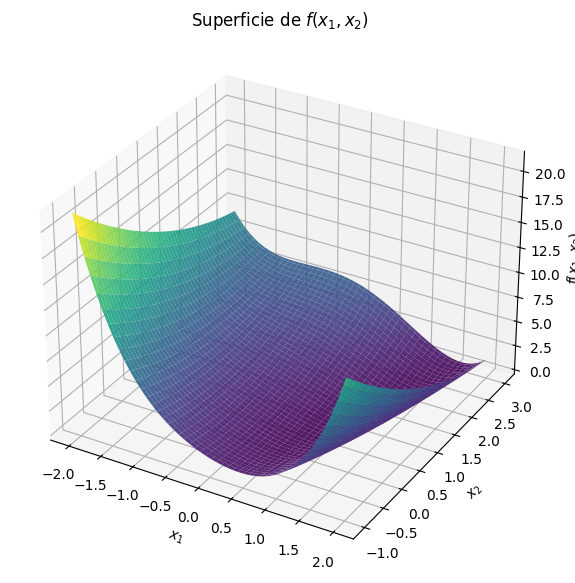

In [35]:
%matplotlib inline

f_lambdified = sp.lambdify((x1, x2), f, modules="numpy")
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_lambdified(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax.set_title("Superficie de $f(x_1, x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
plt.show()

In [36]:
x1, x2, t = sp.symbols('x1 x2 t')
f = x1**2 + x2**2 + x1*x2 + 4*x1 - x2 + 1
display(Latex(r"$f(x_1, x_2) = " + sp.latex(f) + "$"))

<IPython.core.display.Latex object>

In [37]:
x0 = sp.Matrix([2, -1])
p = sp.Matrix([-1, 1])
x_t = x0 + t * p
display(Latex(r"$\vec{x}(t) = \vec{x}_0 + t \vec{p} = " + sp.latex(x_t) + "$"))

<IPython.core.display.Latex object>

In [38]:
x1_t, x2_t = x_t[0], x_t[1]
f_t = f.subs({x1: x1_t, x2: x2_t})
display(Latex("$f(t) = " + sp.latex(f_t) + "$"))

<IPython.core.display.Latex object>

In [39]:
f_t_deriv = sp.diff(f_t, t)
t_min = sp.solve(f_t_deriv, t)[0]
display(Latex("$f'(t) = " + sp.latex(f_t_deriv) + "$"))
display(Latex(f"$t^* = {sp.latex(t_min)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [40]:
z = x_t.subs(t, t_min)
display(Latex(r"$\vec{z} = " + sp.latex(z) + "$"))

<IPython.core.display.Latex object>

In [41]:
grad_f = sp.Matrix([sp.diff(f, x1), sp.diff(f, x2)])
grad_at_z = grad_f.subs({x1: z[0], x2: z[1]})
dot_product = (grad_at_z.T * p)[0]

display(Latex(r"$\nabla f(\vec{z}) = " + sp.latex(grad_at_z) + "$"))
display(Latex(r"$\nabla f(\vec{z})^T \vec{p} = " + sp.latex(dot_product) + "$"))

if dot_product == 0:
    print("✅ ¡Verificado! El producto escalar es 0. Es un mínimo.")
else:
    print("⚠️ El producto escalar no es 0. Puede que no sea un mínimo.")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

✅ ¡Verificado! El producto escalar es 0. Es un mínimo.


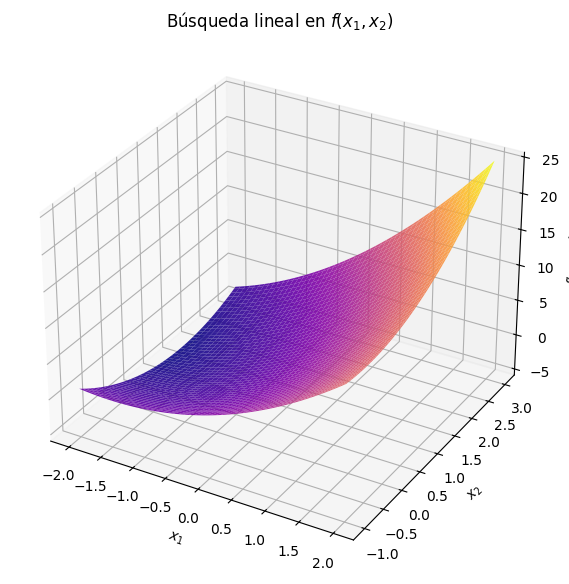

In [42]:
%matplotlib inline

f_lambdified = sp.lambdify((x1, x2), f, modules="numpy")
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_lambdified(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.9)
ax.set_title("Búsqueda lineal en $f(x_1, x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
plt.show()